# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="https://drive.google.com/uc?id=1j4eZRrDDC_ayowY7oj2ymsRMphdE4Tuf" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="https://drive.google.com/uc?id=1xQC3f1RCcZxyVUbZ71T-e4HyRIJFF94C" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
### YOUR CODE HERE ###
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.utils import resample


Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset into dataframe
file_path = '/content/drive/My Drive/Advanced Data Analytics Certificate/Activity Datasets/tiktok_dataset.csv'
data = pd.read_csv(file_path)

<img src="https://drive.google.com/uc?id=1kpRJdR0z6z3foENI0hyMdZ9duLvXZ8Ca" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


1. Outliers and extreme data values can significantly impact linear regression equations. After visualizing data, make a plan for addressing outliers by dropping rows, substituting extreme data with average data, and/or removing data values greater than 3 standard deviations.
2. EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with data set means, medians, and other similar methods.
3. It's important to check for things like multicollinearity between predictor variables, as well to understand their distributions, as this will help you decide what statistical inferences can be made from the model and which ones cannot.
4. Additionally, it can be useful to engineer new features. For example, in this dataset you can create a new variable by extracting the length of String values from the `video_transcription_text` variable.

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [4]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [5]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [6]:
# Get data types of columns
### YOUR CODE HERE ###
data.dtypes

,0
#,int64
claim_status,object
video_id,int64
video_duration_sec,int64
video_transcription_text,object
verified_status,object
author_ban_status,object
video_view_count,float64
video_like_count,float64
video_share_count,float64


Get basic information about the dataset.

In [7]:
# Get basic information
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [8]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [9]:
# Check for missing values
### YOUR CODE HERE ###
data.isna().sum()

,0
#,0
claim_status,298
video_id,0
video_duration_sec,0
video_transcription_text,298
verified_status,0
author_ban_status,0
video_view_count,298
video_like_count,298
video_share_count,298


In [10]:
# EXTRA
data['verified_status'].value_counts(normalize=True)

,proportion
verified_status,
not verified,0.936023
verified,0.063977


In [11]:
# Drop rows with missing values
### YOUR CODE HERE ###
data = data.dropna(axis=0)

In [12]:
# Display first few rows after handling missing values
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [13]:
# EXTRA
data['verified_status'].value_counts(normalize=True)

,proportion
verified_status,
not verified,0.93712
verified,0.06288


Check for and handle duplicates.

In [14]:
# Check for duplicates
### YOUR CODE HERE ###
data.duplicated().sum()

0

Check for and handle outliers.

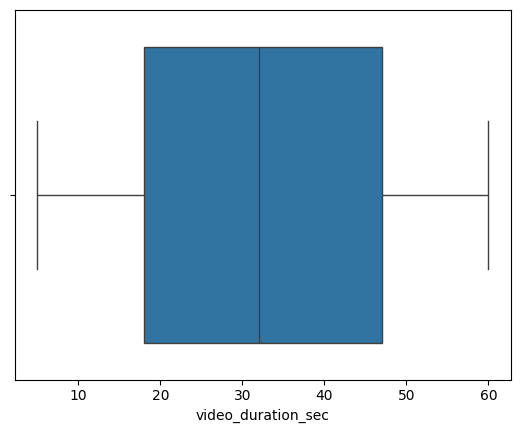

In [15]:
# Create a boxplot to visualize distribution of `video_duration_sec`
### YOUR CODE HERE ###
sns.boxplot(x=data['video_duration_sec'])
plt.show()

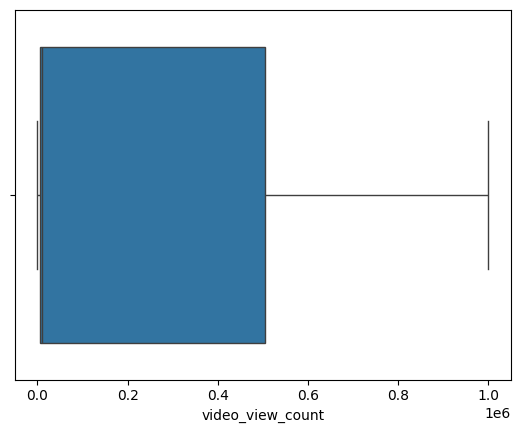

In [16]:
# Create a boxplot to visualize distribution of `video_view_count`
### YOUR CODE HERE ###
sns.boxplot(x=data['video_view_count'])
plt.show()

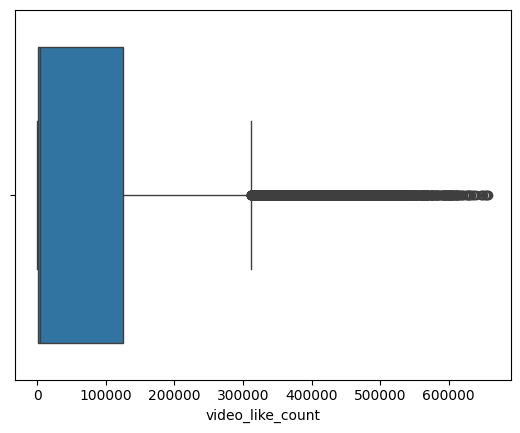

In [17]:
# Create a boxplot to visualize distribution of `video_like_count`
### YOUR CODE HERE ###
sns.boxplot(x=data['video_like_count'])
plt.show()

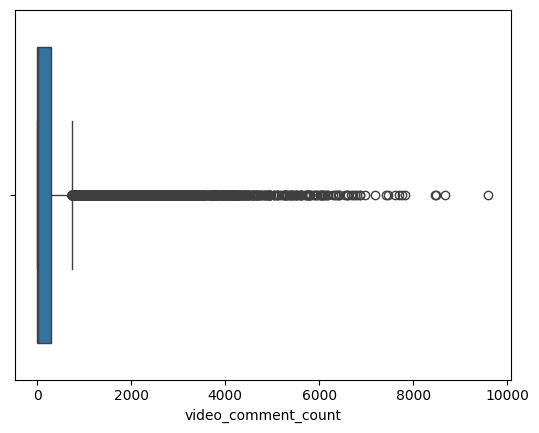

In [18]:
# Create a boxplot to visualize distribution of `video_comment_count`
### YOUR CODE HERE ###
sns.boxplot(x=data['video_comment_count'])
plt.show()

In [19]:
# Check for and handle outliers for video_like_count
### YOUR CODE HERE ###
'''
# Calculate the IQR for `video_like_count`
Q1 = data['video_like_count'].quantile(0.25)
Q3 = data['video_like_count'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers, replace default 1.5 with ?
lower_bound = Q1 - 2 * IQR
print("lower_bound:", lower_bound)
upper_bound = Q3 + 2 * IQR
print("upper_bound:", upper_bound)

# Filter the DataFrame to remove outliers
rows_before = data.shape[0]
data = data[(data['video_like_count'] >= lower_bound) & (data['video_like_count'] <= upper_bound)]
rows_after = data.shape[0]
rows_removed = rows_before - rows_after
print(f"Number of rows removed: {rows_removed}")

# Create a boxplot to visualize the distribution of `video_like_count` after handling outliers
sns.boxplot(x=data['video_like_count'])
plt.show()
'''


'\n# Calculate the IQR for `video_like_count`\nQ1 = data[\'video_like_count\'].quantile(0.25)\nQ3 = data[\'video_like_count\'].quantile(0.75)\nIQR = Q3 - Q1\n\n# Define the lower and upper bounds for outliers, replace default 1.5 with ?\nlower_bound = Q1 - 2 * IQR\nprint("lower_bound:", lower_bound)\nupper_bound = Q3 + 2 * IQR\nprint("upper_bound:", upper_bound)\n\n# Filter the DataFrame to remove outliers\nrows_before = data.shape[0]\ndata = data[(data[\'video_like_count\'] >= lower_bound) & (data[\'video_like_count\'] <= upper_bound)]\nrows_after = data.shape[0]\nrows_removed = rows_before - rows_after\nprint(f"Number of rows removed: {rows_removed}")\n\n# Create a boxplot to visualize the distribution of `video_like_count` after handling outliers\nsns.boxplot(x=data[\'video_like_count\'])\nplt.show()\n'

Check class balance.

In [20]:
# Check class balance for video_comment_count (actually verified_status?)
### YOUR CODE HERE ###
#data['verified_status'].value_counts(normalize=True)

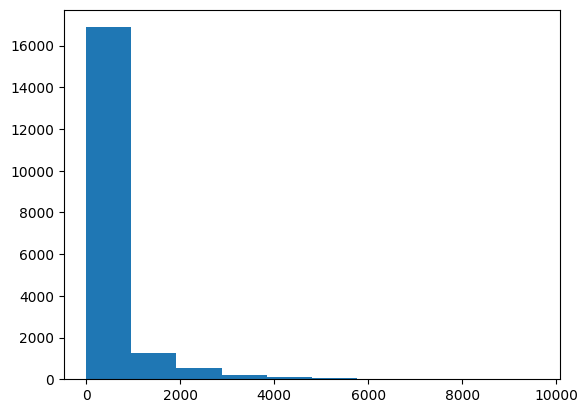

In [21]:
# prompt: plot a histogram for video_comment_count

plt.hist(data['video_comment_count'])
plt.show()


(Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.)

Use resampling to create class balance in the outcome variable, if needed.

In [22]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
### YOUR CODE HERE ###
# Separate majority and minority classes
majority_class = data[data['verified_status'] == "not verified"]
minority_class = data[data['verified_status'] == "verified"]

# Upsample the minority class (which is "verified")
### YOUR CODE HERE ###
#from sklearn.utils import resample
minority_upsampled = resample(minority_class,
                             replace=True,
                             n_samples=len(majority_class),
                             random_state=0)

# Combine majority class with upsampled minority class
### YOUR CODE HERE ###
data_upsampled = pd.concat([majority_class, minority_upsampled])

# Display new class counts
### YOUR CODE HERE ###
data_upsampled['verified_status'].value_counts()

,count
verified_status,
not verified,17884
verified,17884


Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [23]:
# prompt: Get the average video_transcription_text length for videos posted by verified accounts and the average video_transcription_text length fro videos posted by unverified accounts.

# Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.
print("Average video transcription text length verified accounts:", data_upsampled[data_upsampled['verified_status'] == 'verified']['video_transcription_text'].str.len().mean())
print("Average video transcription text length unverified accounts:", data_upsampled[data_upsampled['verified_status'] == 'not verified']['video_transcription_text'].str.len().mean())


Average video transcription text length verified accounts: 84.56955938268844
Average video transcription text length unverified accounts: 89.40114068441065


In [24]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
### YOUR CODE HERE ###
print("Average video transcription text length claims:", data_upsampled[data_upsampled['claim_status'] == 'claim']['video_transcription_text'].str.len().mean())
print("Average video transcription text length opinions:", data_upsampled[data_upsampled['claim_status'] == 'opinion']['video_transcription_text'].str.len().mean())


Average video transcription text length claims: 95.20003199232184
Average video transcription text length opinions: 82.57064259617451


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [25]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
data_upsampled['text_length'] = data_upsampled['video_transcription_text'].str.len()

In [26]:
# Display first few rows of dataframe after adding new column
### YOUR CODE HERE ###
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

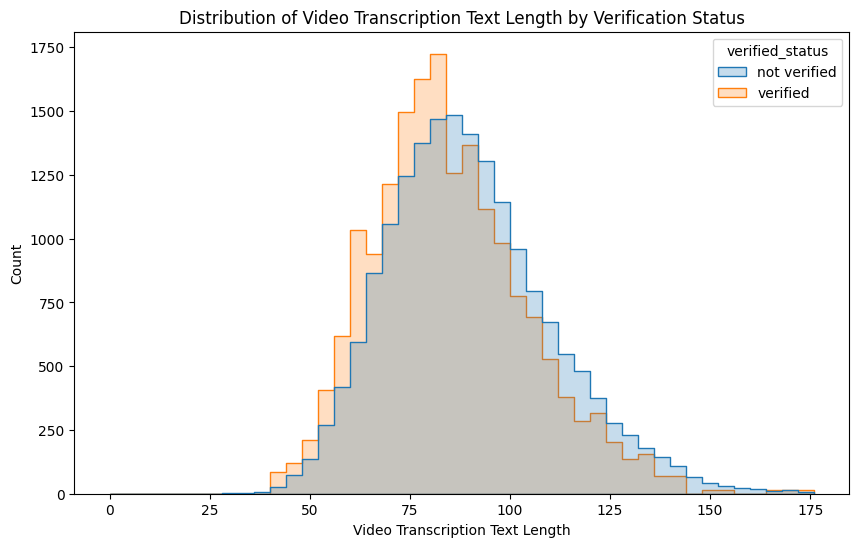

In [27]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
### YOUR CODE HERE ###
plt.figure(figsize=(10, 6))
sns.histplot(data=data_upsampled, x='text_length', bins=range(0, 180, 4), hue='verified_status', element='step')
#sns.histplot(data=data_upsampled, x='text_length')
plt.title('Distribution of Video Transcription Text Length by Verification Status')
plt.xlabel('Video Transcription Text Length')
plt.ylabel('Count')
plt.show()

### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [28]:
# Code a correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
corr = data_upsampled.corr(numeric_only=True)
corr

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.581483,-0.504015,-0.487096,-0.413799,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.006507,0.010515,0.008753,0.013983,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004890,0.002206,0.003989,-0.004586,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.832832,0.711313,0.690048,0.583485,0.244693
video_like_count,-0.581483,0.006507,0.004890,0.832832,1.000000,0.850053,0.828082,0.706140,0.202386
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.850053,1.000000,0.710117,0.620182,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.828082,0.710117,1.000000,0.857679,0.173396
video_comment_count,-0.413799,0.013983,-0.004586,0.583485,0.706140,0.620182,0.857679,1.000000,0.149750
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.202386,0.171651,0.173396,0.149750,1.000000


Visualize a correlation heatmap of the data.

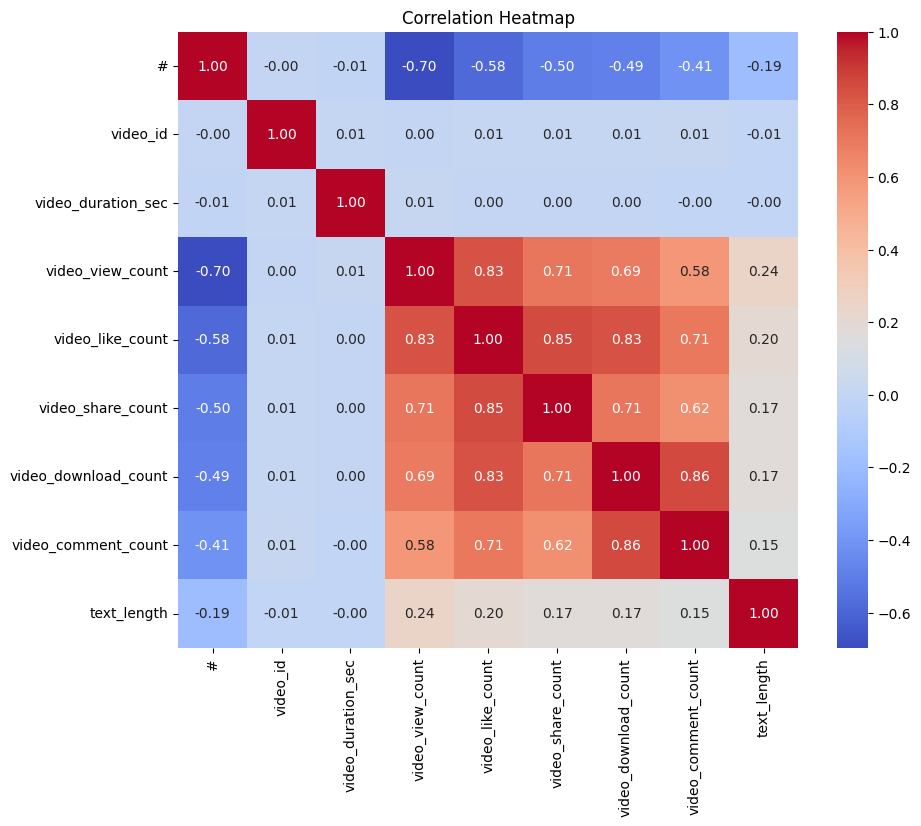

In [29]:
# Create a heatmap to visualize how correlated variables are
### YOUR CODE HERE ###
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?
* The following numeric variables appear to have fair amounts of correlation with each other:
    * video_view_count
    * video_like_count
    * video_share_count
    * video_download_count
    * video_comment_count

<img src="https://drive.google.com/uc?id=1xa68IrpTXu0KRFO49MEMiLaje8469nsk" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [30]:
verified_mapping = {"verified": 1.0, "not verified": 0.0}
data_upsampled['verified_status'] = data_upsampled['verified_status'].map(verified_mapping)
data_upsampled['verified_status'] = data_upsampled['verified_status'].astype('float64')
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,0.0,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,0.0,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,0.0,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,0.0,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,0.0,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [31]:
# Select outcome variable
### YOUR CODE HERE ###
y = data_upsampled[['verified_status']]

In [32]:
data_upsampled['video_view_count'] = np.log(data_upsampled['video_view_count'])

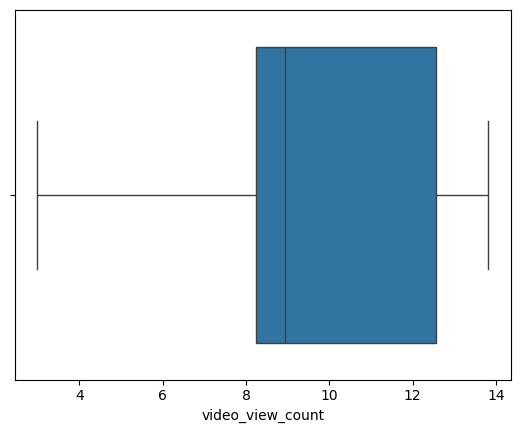

In [81]:
sns.boxplot(x=data_upsampled['video_view_count'])
plt.show()

Select the features.

In [33]:
# Select features
### YOUR CODE HERE ###
X = data_upsampled[['video_view_count']]

# Display first few rows of features dataframe
### YOUR CODE HERE ###
X.head()

,video_view_count
0,12.746348
1,11.855642
2,13.712575
3,12.988846
4,10.936085


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [34]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Confirm that the dimensions of the training and testing sets are in alignment.

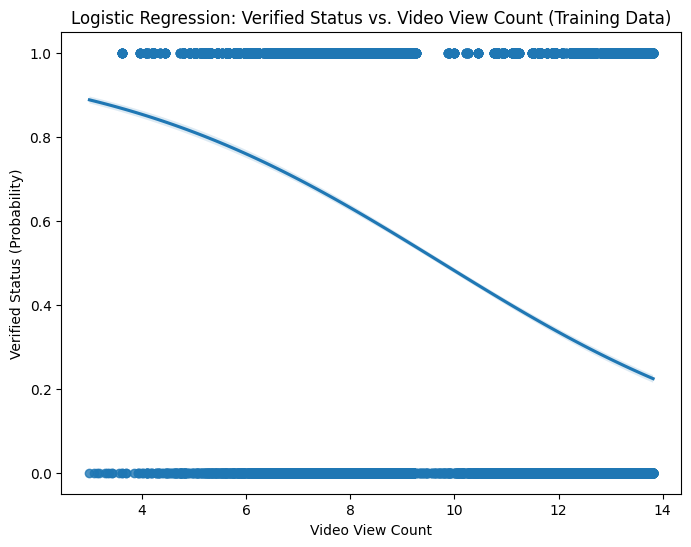

In [35]:
# Create regplot
plt.figure(figsize=(8, 6))
sns.regplot(x=X_train, y=y_train, data=data, logistic=True)
plt.title('Logistic Regression: Verified Status vs. Video View Count (Training Data)')
plt.xlabel('Video View Count')
plt.ylabel('Verified Status (Probability)')
plt.show()

In [36]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26826, 1) (8942, 1) (26826, 1) (8942, 1)


### **Task 3c. Encode variables**

Check the data types of the features.

In [37]:
# Check data types
### YOUR CODE HERE ###
X_train.dtypes

,0
video_view_count,float64


In [38]:
# Get unique values in `claim_status`
### YOUR CODE HERE ###
#X_train['claim_status'].unique()


In [39]:
# Get unique values in `author_ban_status`
### YOUR CODE HERE ###
#X_train['author_ban_status'].unique()

(As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.)

In [40]:
# Select the training features that needs to be encoded
### YOUR CODE HERE ###
#X_train_to_encode = X_train[['claim_status', 'author_ban_status']]

# Display first few rows
### YOUR CODE HERE ###
#X_train_to_encode.head()

In [41]:
# Set up an encoder for one-hot encoding the categorical features
### YOUR CODE HERE ###
#encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')
#encoder = preprocessing.OneHotEncoder(drop='first', sparse=False)

In [42]:
# Fit and transform the training features using the encoder
### YOUR CODE HERE ###
#X_train_encoded = encoder.fit_transform(X_train_to_encode)

In [43]:
# Get feature names from encoder
### YOUR CODE HERE ###
#encoder.get_feature_names_out()

In [44]:
# Display first few rows of encoded training features
### YOUR CODE HERE ###
#X_train_encoded[:5,:]

In [45]:
# Place encoded training features (which is currently an array) into a dataframe
### YOUR CODE HERE ###
#X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=encoder.get_feature_names_out())

# Display first few rows
### YOUR CODE HERE ###
#X_train_encoded_df.head()

In [46]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###
#X_train.drop(columns=['claim_status', 'author_ban_status']).head()

In [47]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
### YOUR CODE HERE ###
#X_train_final = pd.concat([X_train.drop(columns=['claim_status', 'author_ban_status']).reset_index(drop=True), X_train_encoded_df], axis=1)
# Display first few rows
### YOUR CODE HERE ###
#X_train_final.head()

Check the data type of the outcome variable.

In [48]:
# Check data type of outcome variable
### YOUR CODE HERE ###
y_train.dtypes

,0
verified_status,float64


In [49]:
# Get unique values of outcome variable
### YOUR CODE HERE ###
y_train['verified_status'].unique()

array([1., 0.])

(A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.)

In [50]:
# Set up an encoder for one-hot encoding the categorical outcome variable
### YOUR CODE HERE ###
#encoder_y = preprocessing.OneHotEncoder(handle_unknown='ignore')
#encoder_y = preprocessing.OneHotEncoder(drop='first', sparse=False)

In [51]:
# EXTRA
y_train.head()

,verified_status
13017,1.0
18612,1.0
15278,1.0
14230,1.0
12024,1.0


In [52]:
# EXTRA
y_train.tail()

,verified_status
10277,1.0
10432,1.0
14818,1.0
14733,1.0
2799,0.0


In [53]:
# prompt: Encode the training outcome variable.

# Fit and transform the training outcome variable using the encoder
#encoder_y.fit(y_train)
#y_train_encoded = encoder_y.transform(y_train).toarray()
#y_train_encoded


In [54]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
### YOUR CODE HERE ###
#encoder_y.fit(y_train.values.reshape(-1, 1))
#y_train_encoded = encoder_y.transform(y_train).toarray()
#y_train_encoded = encoder_y.transform(y_train).ravel()

# Display the encoded training outcome variable
### YOUR CODE HERE ###
#y_train_encoded

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [55]:
# prompt: Construct a model and fit it to the training set

# Construct a logistic regression model and fit it to the training set
### YOUR CODE HERE ###
#log_reg = LogisticRegression(random_state=0, max_iter=800)
#log_reg.fit(X_train_final, y_train_encoded)


In [56]:
# Construct a logistic regression model and fit it to the training set
### YOUR CODE HERE ###
log_reg = LogisticRegression(random_state=0, max_iter=800)
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=800, random_state=0)

<img src="https://drive.google.com/uc?id=1O04Ts47cyQs_UPSPtJxUXGEKsSpteLRL" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [57]:
# Select the testing features that needs to be encoded
### YOUR CODE HERE ###
#X_test = X_test[['video_view_count']]

# Display first few rows
### YOUR CODE HERE ###
X_test.head()

,video_view_count
19021,7.658228
14908,8.648397
2902,13.016485
5865,13.583343
12086,7.622664


In [58]:
# Transform the testing features using the encoder
### YOUR CODE HERE ###
#X_test_encoded = encoder.transform(X_test_to_encode).toarray()
#X_test_encoded = encoder.transform(X_test_to_encode)
#display(encoder.get_feature_names_out())

# Display first few rows of encoded testing features
### YOUR CODE HERE ###
#X_test_encoded[:5,:]

In [59]:
# Place encoded testing features (which is currently an array) into a dataframe
### YOUR CODE HERE ###
#X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=encoder.get_feature_names_out())

# Display first few rows
### YOUR CODE HERE ###
#X_test_encoded_df.head()

In [60]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###
#X_test.drop(columns=['claim_status', 'author_ban_status']).head()

In [61]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
### YOUR CODE HERE ###
#X_test_final = pd.concat([X_test.drop(columns=['claim_status', 'author_ban_status']).reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
### YOUR CODE HERE ###
#X_test_final.head()

Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [62]:
# Use the logistic regression model to get predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred = log_reg.predict(X_test)

Display the predictions on the encoded testing set.

In [63]:
# Display the predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

Display the true labels of the testing set.

In [64]:
# Display the true labels of the testing set
### YOUR CODE HERE ###
y_test

,verified_status
19021,1.0
14908,1.0
2902,1.0
5865,0.0
12086,0.0
...,...
15605,0.0
11833,1.0
15655,0.0
3025,1.0


Encode the true labels of the testing set so it can be compared to the predictions.

In [65]:
# prompt: Encode the testing outcome variable

# Encode the testing outcome variable
#y_test_encoded = encoder_y.transform(y_test).toarray()

# Display the encoded testing outcome variable
#y_test_encoded


In [66]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
### YOUR CODE HERE ###
#y_test_encoded = encoder_y.transform(y_test).toarray()
#y_test_encoded = encoder_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
#y_test_encoded

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [67]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
#print(X_train_final.shape, X_test_final.shape, y_train_encoded.shape, y_test_encoded.shape)

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

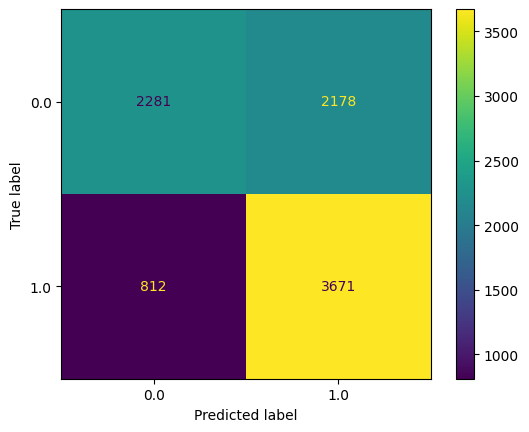

In [68]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)

# Create display of confusion matrix
### YOUR CODE HERE ###
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
disp.plot()

# Display plot
### YOUR CODE HERE ###
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [76]:
cm[1,1]/(cm[1,1] + cm[1,0])

0.8188712915458398

In [71]:
# Create a classification report
### YOUR CODE HERE ###
#{"verified": 1.0, "not verified": 0.0}
target_names = ['not verified', 'verified']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

not verified       0.74      0.51      0.60      4459
    verified       0.63      0.82      0.71      4483

    accuracy                           0.67      8942
   macro avg       0.68      0.67      0.66      8942
weighted avg       0.68      0.67      0.66      8942



### **Task 4c. Interpret model coefficients**

In [ ]:
# prompt: Get the feature names from the model and the model coefficients (which represent log-odds ratios). Place into a DataFrame for readability.

# Get the feature names from the model
#feature_names = X_train_final.columns

# Get the coefficients (log-odds ratios) from the model
#coefficients = log_reg.coef_.ravel()

# Create a DataFrame for readability
#coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
#coefficients_df


In [80]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
### YOUR CODE HERE ###
# Get the feature names from the model
feature_names = X_train.columns

# Get the coefficients (log-odds ratios) from the model
coefficients = log_reg.coef_.ravel()
display(coefficients)
display(log_reg.coef_)

# Create a DataFrame for readability
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df

array([-0.30599827])

array([[-0.30599827]])

,Feature,Coefficient
0,video_view_count,-0.305998


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

==> ENTER YOUR RESPONSE TO QUESTIONS 1 AND 2 HERE

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.